# Draft Plots 

## Setup and Functions

### Packages and Functions

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
import plotly

In [5]:
def get_hels(df: pd.DataFrame) -> pd.DataFrame:
    """"
    Returns a dataframe with normal and weighted Health, Education, and Living Standards
    """
    df.loc[:, "Health"] = df["Nutrition"] + df["Child mortality"]
    df.loc[:, "Education"] = df["Years of schooling"] + df["School attendance"]
    df.loc[:, "Living Standards"] = (df["Cooking fuel"] + df["Sanitation"] + df["Drinking water"]
                                    + df["Electricity"] + df["Housing"] + df["Assets"])

    df.loc[:, "Health_w"] = df["Nutrition_w"] + df["Child mortality_w"]
    df.loc[:, "Education_w"] = df["Years of schooling_w"] + df["School attendance_w"]
    df.loc[:, "Living Standards_w"] = (df["Cooking fuel_w"] + df["Sanitation_w"] + df["Drinking water_w"]
                                    + df["Electricity_w"] + df["Housing_w"] + df["Assets_w"])
    
    return df

def plot_regional_mpi(df: pd.DataFrame, region_name: str):
    """
    Returns a plot of the regional MPI
    """
    health = df["Health_w"].sum()
    education = df["Education_w"].sum()
    ls = df["Living Standards_w"].sum()

    region_mpi = pd.DataFrame({"MPI": [health + education + ls],
                       "Health": [health],
                         "Education": [education],
                         "Living Standards": [ls],
                         "Index": [region_name]})

    region_mpi.set_index("Index").drop(columns="MPI").plot(kind="barh", stacked=True, color= gen_colors, width= 0.1)

### DataFrames

In [6]:
world_df = pd.read_csv("/Users/samiadam/Desktop/ /School/Y3 S2/IT Project/Filtered Data/every_country.csv", index_col = 1)
world_df.drop(columns="Unnamed: 0", inplace= True)
world_df.fillna(0, inplace= True)
world_df = get_hels(world_df)


regions = ['Europe and Central Asia', 'Latin America and the Caribbean', 'Arab States',
           'East Asia and the Pacific', 'South Asia', 'Sub-Saharan Africa']

for region in regions:
    file_name = region.lower().replace(" ", "_").replace("-", "_") + "_df"
    var_name = region.lower().replace(" ", "_").replace("-", "")
    globals()[var_name] = pd.read_csv(f"/Users/samiadam/Desktop/ /School/Y3 S2/IT Project/Filtered Data/{file_name}.csv", index_col=1).drop(columns="Unnamed: 0")
    globals()[var_name] = get_hels(globals()[var_name])
    globals()[var_name].fillna(0, inplace= True)

## Plotting

## Highest and Lowest MPIs

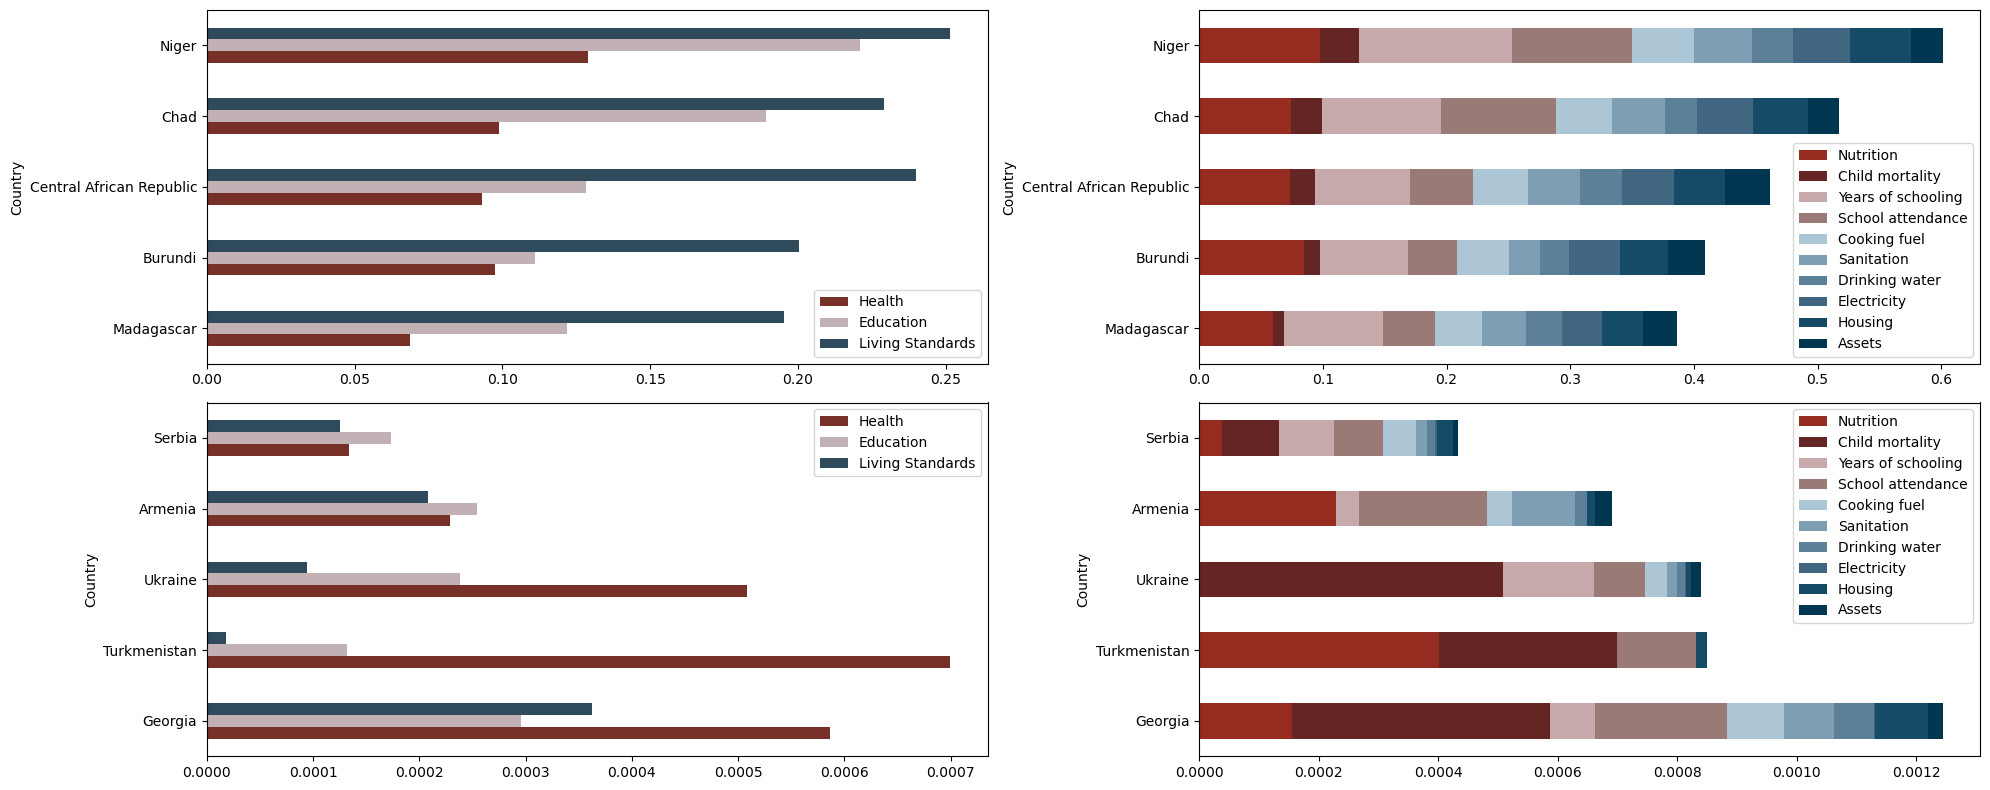

In [7]:
important_vars = ['Nutrition', 'Child mortality', 'Years of schooling',
       'School attendance', 'Cooking fuel', 'Sanitation', 'Drinking water',
       'Electricity', 'Housing', 'Assets']

general_vars = ["Health", "Education", "Living Standards"]


var_colors = ["#962c20", "#642524", "#c5a9ab", "#997a77", "#acc6d6", "#7d9eb3",
         "#5d8099", "#416682", "#154b66", "#003650"]

gen_colors = ["#763028", "#c1b0b4", "#2f4a5b"]

fig, axs = subplots(2,2, figsize= (20,8))

large_df = world_df.nlargest(5, "MPI").sort_values("MPI", ascending= True)
small_df = world_df.nsmallest(5, "MPI").sort_values("MPI", ascending= False)

large_df[general_vars].plot(kind="barh", stacked=False, color= gen_colors, ax= axs[0,0])
large_df[important_vars].plot(kind="barh", stacked=True, color= var_colors, ax= axs[0,1])
small_df[general_vars].plot(kind="barh", stacked=False, color= gen_colors, ax= axs[1,0])
small_df[important_vars].plot(kind="barh", stacked=True, color= var_colors, ax= axs[1,1])

plt.tight_layout()


<Axes: ylabel='Country'>

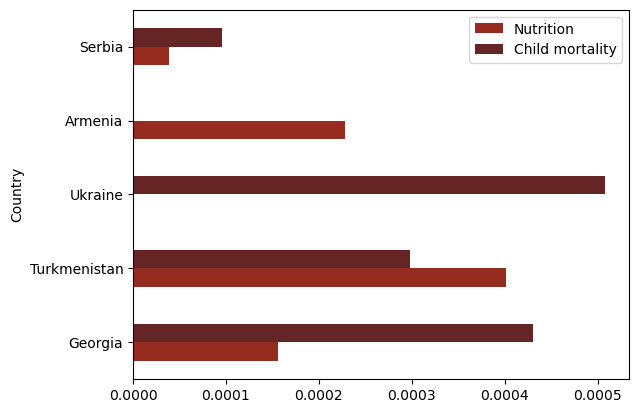

In [15]:
small_df[important_vars][["Nutrition", "Child mortality"]].plot(kind="barh", stacked=False, color= var_colors)


## World and Region MPI Values

In [9]:
regions_mpi = pd.DataFrame({"MPI": [],
                       "Health": [],
                         "Education": [],
                         "Living Standards": [],
                         "Region": []})

mpi_comparison_regions = ['Europe and Central Asia', 'Latin America and the Caribbean', 'Arab States',
           'East Asia and the Pacific', 'South Asia', 'Sub-Saharan Africa', "World"]

for region in mpi_comparison_regions:
    
    if region != "World":
        var_name = region.lower().replace(" ", "_").replace("-", "")
        df = globals()[var_name]
    
    else:
        df = world_df
    
    health = df["Health_w"].sum()
    education = df["Education_w"].sum()
    ls = df["Living Standards_w"].sum()

    region_mpi = pd.DataFrame({"MPI": [health + education + ls],
                       "Health": [health],
                         "Education": [education],
                         "Living Standards": [ls],
                         "Region": [region]})
    
    regions_mpi = pd.concat([regions_mpi, region_mpi], axis=0)
    
regions_mpi.reset_index(inplace=True)
regions_mpi.drop(columns= "index", inplace=True)
regions_mpi

,MPI,Health,Education,Living Standards,Region
0,0.002716,0.001262,0.000722,0.000732,Europe and Central Asia
1,0.018685,0.002654,0.006665,0.009366,Latin America and the Caribbean
2,0.073602,0.019301,0.025367,0.028934,Arab States
3,0.017736,0.005018,0.007731,0.004987,East Asia and the Pacific
4,0.090826,0.024969,0.030824,0.035033,South Asia
5,0.251742,0.044085,0.077385,0.130272,Sub-Saharan Africa
6,0.088134,0.021349,0.027833,0.038953,World


Region
Arab States                        10
East Asia and the Pacific          16
Europe and Central Asia            14
Latin America and the Caribbean    23
South Asia                          7
Sub-Saharan Africa                 40
dtype: int64


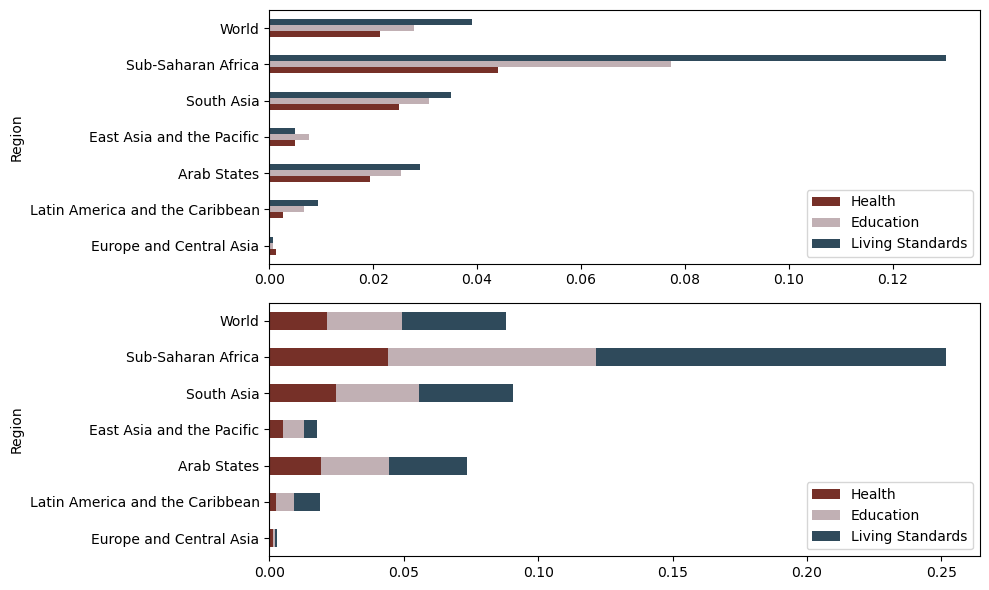

In [10]:
print(world_df.groupby("Region").size())

fig, axs = subplots(2,1,figsize= (10,6))

regions_mpi.set_index("Region").drop(columns="MPI").plot(kind="barh", color= gen_colors, stacked=False, ax = axs[0])
regions_mpi.set_index("Region").drop(columns="MPI").plot(kind="barh", color= gen_colors, stacked=True, ax = axs[1])
plt.tight_layout();

## Regional MPI Values

### Arab States

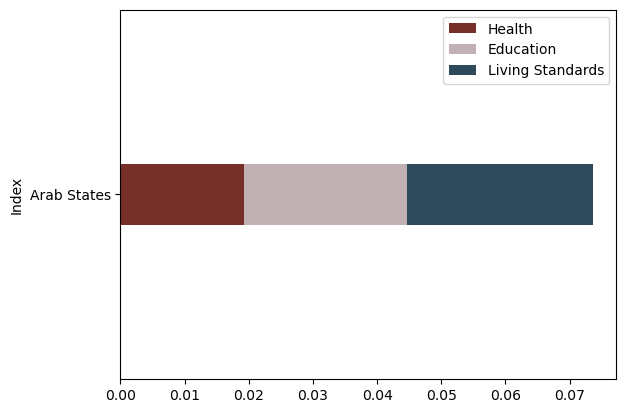

In [11]:
plot_regional_mpi(arab_states, "Arab States")

### Latin America and Carribean

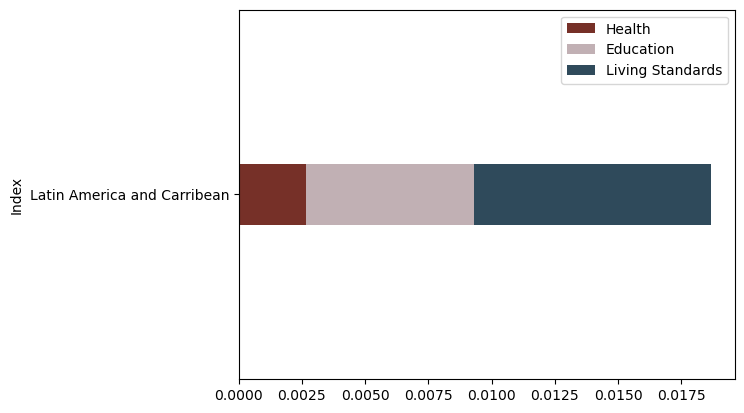

In [12]:
plot_regional_mpi(latin_america_and_the_caribbean, "Latin America and Carribean")

### Sub-Saharan Africa

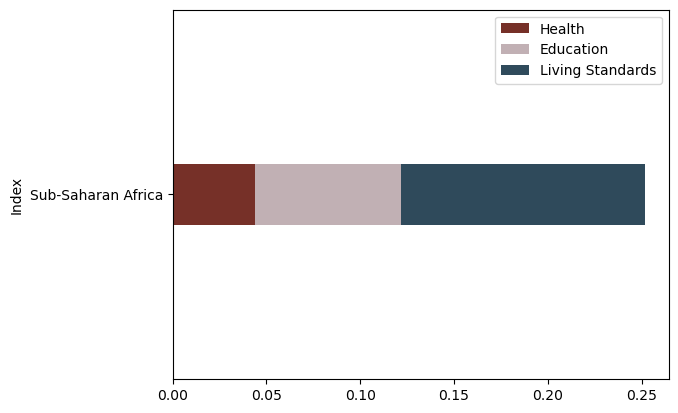

In [13]:
plot_regional_mpi(subsaharan_africa, "Sub-Saharan Africa")